In [19]:
import pandas as pd
import numpy as np

In [378]:
ORIGINAL = False

In [379]:
if ORIGINAL:
    df = pd.read_csv("table.tex", sep="&", header=None, names=["Colors","IIb","Ib","Ibn","Ic","Ic-bl"])
df

,Colors,IIb,Ib,Ibn,Ic,Ic-bl
0,U-w2,$-1.84 \pm 1.7$,$-2.99 \pm 0.66$,$-3.33 \pm 3.65$,$-2.11 \pm 0.42$,$-1.21 \pm 1.98$ \\
1,U-m2,-,-,-,-,- \\
2,U-B,$0.01 \pm 0.32$,$0.23 \pm 0.52$,$-1.12 \pm 0.06$,$-0.1 \pm 0.39$,$-0.06 \pm 0.6$ \\
3,U-V,$0.58 \pm 0.44$,$0.83 \pm 0.69$,$-1.11 \pm 0.09$,$0.7 \pm 0.69$,$0.46 \pm 0.71$ \\
4,U-g,$0.31 \pm 0.26$,$0.09 \pm 0.27$,-,-,- \\
...,...,...,...,...,...,...
83,K-w1,-,-,$1.06 \pm 0.3$,-,- \\
84,K-w2,-,-,$-2.5 \pm 3.75$,-,- \\
85,w1-w2,$-0.68 \pm 0.75$,$-0.92 \pm 0.78$,$-2.12 \pm 2.84$,-,$-0.75 \pm 0.9$ \\
86,w1-m2,-,-,-,-,- \\


In [381]:
if ORIGINAL:
    df["c1"] = [l[0] for l in df["Colors"].str.split("-").to_numpy()]
    df["c2"] = [l[1].strip() for l in df["Colors"].str.split("-").to_numpy()]
    for c in df.columns[1:6]:
        print(c)
        df["tmp"] = df[c].str.replace("$","")
        df["tmp"] = df["tmp"].str.replace("\\","")
        df["tmp"] = df["tmp"].str.split("pm")
        df[c+"_color"] = [l[0] for l in df["tmp"]]
        df[c+"_error"] = [l[1] if len(l) > 1 else np.nan for l in df["tmp"]]
        df[c+"_color"] = pd.to_numeric(df[c+"_color"], errors="coerce")
        df[c+"_error"] = pd.to_numeric(df[c+"_error"], errors="coerce")
    my_list = df["c1"].values
    filters = list(dict.fromkeys(my_list)) + ["m2"]
    #filters = np.array(filters[-1:] + filters[:-1])
    filters

In [400]:
if ORIGINAL:
    colors = {}
    errors = {}
    for col in df.columns[1:6]:
        colors[col] = np.zeros((len(filters), len(filters))) * np.nan
        errors[col] = np.zeros((len(filters), len(filters))) * np.nan
        for i,filter1 in enumerate(filters):
            print(i, filter1)
            for j,filter2 in enumerate(filters):
                #print("\t", j, filter2)
                c = df.loc[(df["c1"] == filter1) * (df["c2"] == filter2)][col + "_color"].values
                ce = df.loc[(df["c1"] == filter1) * (df["c2"] == filter2)][col + "_error"].values
                if len(c) < 1 :
                    c =  - df.loc[(df["c2"] == filter1) * (df["c1"] == filter2)][col + "_color"].values
                    ce = df.loc[(df["c2"] == filter1) * (df["c1"] == filter2)][col + "_error"].values
                
                try:
                    colors[col][i, j] = c[0]
                    if not np.isnan(c):
                        print("\t", j, filter1, filter2, c)
                except IndexError:
                    pass
                try:
                    errors[col][i, j] = ce[0]
                except IndexError:
                    pass
                #errors[i, j] = ce
                #print(colors, errors)

IIb


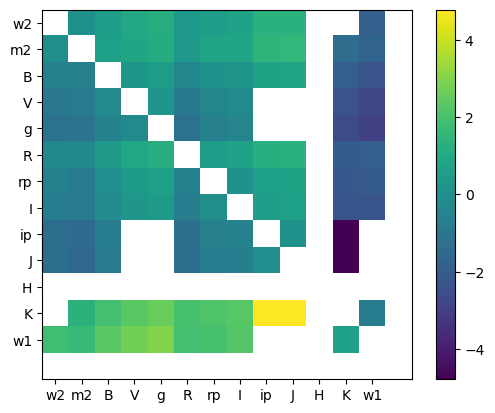

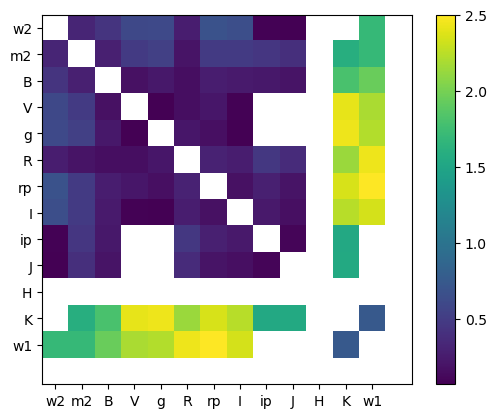

Ib


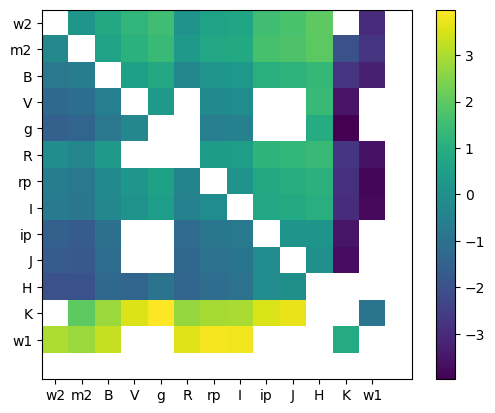

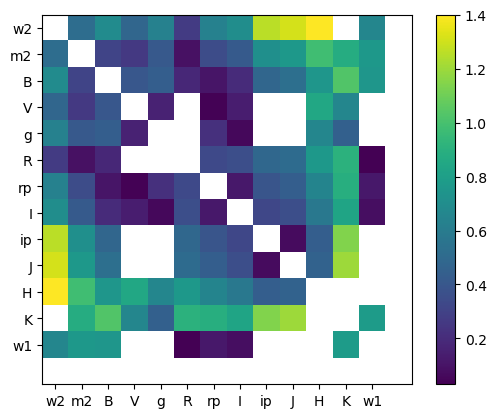

Ibn


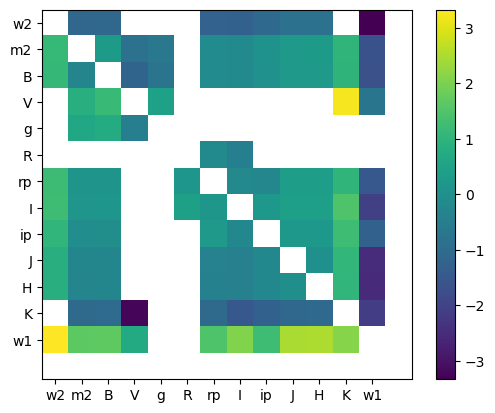

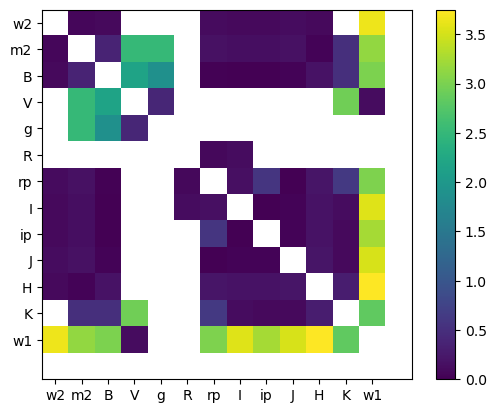

Ic


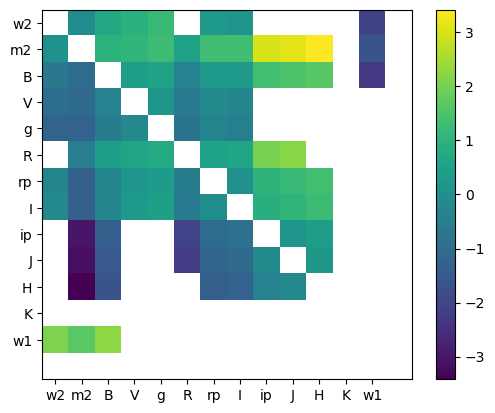

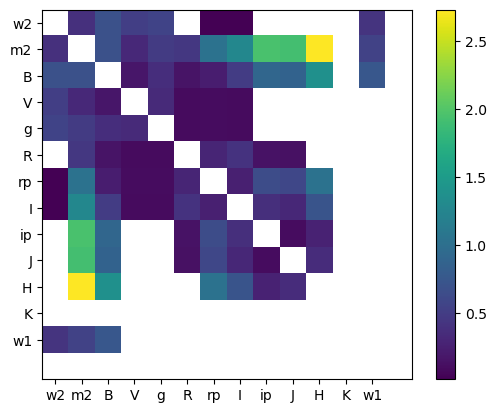

Ic-bl


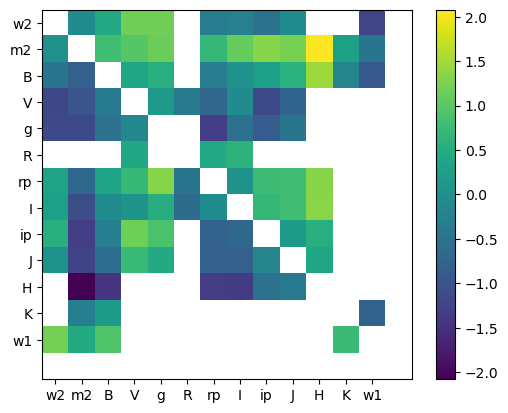

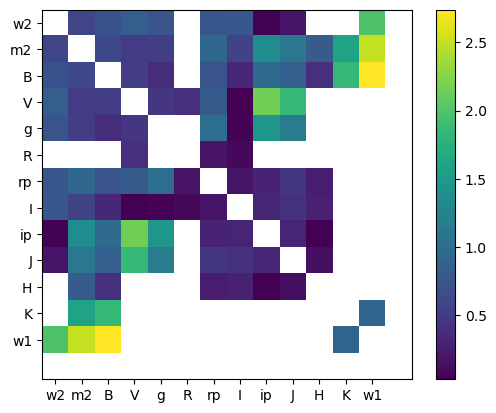

In [295]:
if ORIGINAL:
    import pylab as plt
    for col in df.columns[1:6]:
        print(col)
        plt.imshow(colors[col])
        plt.colorbar()
        plt.yticks(range(len(df["c2"].unique())), df["c2"].unique())
        plt.xticks(range(len(df["c2"].unique())), df["c2"].unique())
        plt.show()
        plt.imshow(errors[col])
        plt.yticks(range(len(df["c2"].unique())), df["c2"].unique())
        plt.xticks(range(len(df["c2"].unique())), df["c2"].unique())
        plt.colorbar()
        plt.show()


In [401]:
if ORIGINAL:
    header = "type" 
    columns = ["type"]
    for i,filter1 in enumerate(filters):
        for j in range(i+1, len(filters)):
            #if not np.isnan(colors["IIb"][i]).all():
            header += f"\t{filters[i]}-{filters[j]}"
            columns += [f"{filters[i]}-{filters[j]}"]
        
    print(header)
    dfnew = pd.DataFrame(columns = columns)
    for sn in df.columns[1:6]:
        dfnew.loc[sn] = np.zeros(len(columns)) * np.nan
    
    
    for sn in df.columns[1:6]:
        for i,filter1 in enumerate(filters):
            print(filter1)
            if  np.isnan(colors[sn][i]).all():
                continue
            for j in range(i+1, len(filters)):
                if not np.isnan(colors[sn][i,j]):
                    #print(colors[sn][i,j])
                    dfnew.loc[sn, f"{filters[i]}-{filters[j]}"]  = colors[sn][i,j]
        #for col in df.columns[1:6]:
    dfnew   
        #print(col) 
    


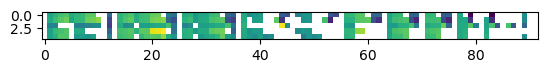

In [297]:
if ORIGINAL:
    plt.imshow(dfnew)

In [298]:
if ORIGINAL:
    headerV = "\colhead{type}" 
    columns = ["type"]
    dfnewV = pd.DataFrame(columns = columns)
    dfnewVerror = pd.DataFrame(columns = columns)
    
    for i,filter1 in enumerate(filters):
        for j in range(i+1, len(filters)):
            if filter1 == "V":
                headerV += "&\colhead{" + f"V-{filters[j]}" + "}"
                columns += [f"V-{filters[j]}"]
            elif filters[j] == "V":
                headerV += "&\colhead{" + f"{filters[j]} - {filter1}" + "}"
                columns += [f"{filters[j]} - {filter1}"]
    
    print(headerV)
    print(columns)
    
    for sn in df.columns[1:6]:
        for i,filter1 in enumerate(filters):
            for j in range(i+1, len(filters)):
                if filter1 == "V":
                    column = f"V-{filters[j]}"
                    dfnewV.loc[sn, column] = colors[sn][i, j]
                    dfnewVerror.loc[sn, column] = errors[sn][i, j]
                elif filters[j] == "V":
                    column = f"{filters[j]} - {filter1}"
                    dfnewV.loc[sn, column] = -colors[sn][j, i]
                    dfnewVerror.loc[sn, column] = errors[sn][j, i]
    
                 #print(colors[sn][i,j])
             
 

\colhead{type}&\colhead{V - U}&\colhead{V - B}&\colhead{V-R}&\colhead{V-I}&\colhead{V-g}&\colhead{V-rp}&\colhead{V-ip}&\colhead{V-J}&\colhead{V-H}&\colhead{V-K}&\colhead{V-w1}&\colhead{V-w2}&\colhead{V-m2}
['type', 'V - U', 'V - B', 'V-R', 'V-I', 'V-g', 'V-rp', 'V-ip', 'V-J', 'V-H', 'V-K', 'V-w1', 'V-w2', 'V-m2']


,type,V - U,V - B,V-R,V-I,V-g,V-rp,V-ip,V-J,V-H,V-K,V-w1,V-w2,V-m2
IIb,NaN,0.58,0.62,0.27,0.49,-0.41,0.09,0.15,0.74,0.85,NaN,-1.94,-2.32,NaN
Ib,NaN,0.83,0.60,0.53,0.81,-0.28,0.18,0.26,1.04,1.17,1.31,-2.77,-3.28,NaN
Ibn,NaN,-1.11,0.31,-1.19,-0.76,NaN,-0.12,-0.16,0.05,0.27,0.28,1.00,-1.69,NaN
Ic,NaN,0.70,0.99,0.38,0.53,-0.38,0.27,0.29,1.34,1.51,1.64,NaN,-2.25,NaN
Ic-bl,NaN,0.46,0.80,0.38,0.52,NaN,-0.34,0.05,0.28,0.57,1.45,-0.18,-0.93,NaN


In [356]:
allfilters = ['U', 'up', 'B', 'V', 'R', 'I', 'g', 'rp', 'ip', 'J', 'H', 'K', 'w1', 'w2', 'm2']

In [357]:
df_original = pd.DataFrame(columns = ["type"] +  [f"M_{f}_gp" for f in allfilters] + [f"M_{f}_gp_err" for f in allfilters])


In [358]:
bands = len(allfilters)
bands

15

In [359]:
types = ["IIb","Ib","Ic","Ic-bl","Ibn"]

In [360]:
for i in range(100):
    snname = f"SN{np.random.randint(1950, 2014)}"
    if snname in list(df_original.index):
        continue
    type = np.random.choice(types)
    df_original.loc[snname] = [type] + list((np.random.randn(bands) + 20))  +  \
                                           list(np.random.randn(bands))
df_original

,type,M_U_gp,M_up_gp,M_B_gp,M_V_gp,M_R_gp,M_I_gp,M_g_gp,M_rp_gp,M_ip_gp,...,M_I_gp_err,M_g_gp_err,M_rp_gp_err,M_ip_gp_err,M_J_gp_err,M_H_gp_err,M_K_gp_err,M_w1_gp_err,M_w2_gp_err,M_m2_gp_err
SN1984,Ic-bl,20.996908,19.888438,19.087170,21.760483,20.168002,18.819851,18.541252,19.411558,19.557837,...,1.449662,-1.177510,1.466450,-0.784907,0.356762,-0.959677,1.333268,0.756176,-0.907220,1.390123
SN1989,Ib,20.802586,19.500504,20.514514,19.588633,20.111330,19.580123,19.371645,19.106502,19.842592,...,0.192974,-0.768868,0.714925,0.409231,-1.318031,-1.199839,0.994300,0.465055,-0.731972,-0.306017
SN1992,Ic-bl,19.447383,19.806853,18.650488,18.340417,21.452719,19.835442,20.891273,20.154697,20.620925,...,-1.431238,-1.594169,-0.858567,0.489960,-2.711030,0.739911,1.067339,0.692140,-2.012801,0.061381
SN2006,Ib,20.921806,20.647846,21.139080,21.070205,19.121269,19.337181,20.462010,20.289778,19.799832,...,-0.010087,1.400415,1.483466,-0.492840,-0.510143,0.723739,1.199770,-0.261871,-0.100560,-0.562760
SN1997,Ic,19.030424,18.211621,17.742175,20.023993,19.378752,18.292761,18.991888,20.300043,19.277016,...,-0.776637,0.085420,-0.241864,-0.183220,0.470190,1.341963,-0.880499,-0.930256,0.603145,0.922314
SN1979,Ic,19.920441,20.555638,19.381583,20.669187,21.084622,18.672768,19.129718,18.761130,20.696826,...,-1.073687,1.014012,0.671499,-0.532987,-0.997371,0.703819,-0.786076,0.070585,1.008243,-2.574263
SN2001,Ibn,20.309900,20.329359,19.777212,18.078509,17.987689,19.369632,19.650953,21.467289,20.214512,...,1.835001,1.081423,-1.365824,0.772791,1.067665,-1.871881,3.299714,1.379360,1.561654,0.235851
SN1980,Ic,20.077732,19.741752,19.821365,17.836828,19.492577,20.108333,19.914246,20.099115,18.839013,...,0.165250,-0.019357,0.328671,0.902795,1.973399,-1.053016,2.070408,1.381150,-1.193248,-1.085917
SN1995,Ibn,19.464667,19.968313,21.570340,20.100323,18.020253,18.815966,19.388823,19.169040,19.622271,...,-1.214067,-1.666777,1.182663,-0.476895,-1.081907,-1.778714,0.549015,0.169123,0.375797,-1.163130
SN1953,Ic-bl,20.282572,19.780667,20.495974,19.137624,20.500857,20.023397,21.109408,20.552535,19.070709,...,1.069757,1.048494,2.565825,-2.053563,-0.461063,-0.483694,0.125025,0.651923,0.819154,0.795406


In [361]:
for c in df_original.columns[1:16]:
    if not c == "M_V_gp":
        b = c.split("_")[1]
        V_b = df_original["M_V_gp"] - df_original[c]
        V_b_error = df_original["M_V_gp_err"]**2 + df_original[c+"_err"]**2
        df_original[f"V-{b}"] = V_b
        df_original[f"V-{b} err"] = V_b_error

In [383]:
dfnewV = df_original.groupby("type").mean().iloc[:,30::2]
dfnewV

,V-U,V-up,V-B,V-R,V-I,V-g,V-rp,V-ip,V-J,V-H,V-K,V-w1,V-w2,V-m2
type,,,,,,,,,,,,,,
IIb,0.076420,-0.449093,-0.223210,0.070634,0.373814,-0.307578,0.608262,-0.017832,-0.223881,0.336009,-0.123441,-0.685223,0.442028,0.030336
Ib,0.110388,0.074803,-0.148077,0.141039,-0.102942,-0.068269,0.297664,-0.285444,-0.346250,0.260155,-0.094756,-0.040144,0.056937,0.044796
Ibn,0.458036,-0.193767,0.192804,0.584837,0.259709,0.470076,0.179186,0.629889,0.141671,-0.163573,-0.371292,0.141062,0.504796,-0.084974
Ic,-0.234555,-0.361287,0.061851,-0.228017,0.145861,-0.199876,-0.293985,-0.225387,-0.440048,-0.373906,-0.909182,-0.388013,-0.355171,-0.034982
Ic-bl,0.346988,0.058940,0.214935,-0.119441,-0.009230,0.079168,0.140709,0.384207,-0.058946,0.493828,0.162536,-0.054275,0.094883,0.195737


In [396]:
dfnewVerror = df_original.groupby("type").mean().iloc[:,31::2]
dfnewVerror.rename({c:c.replace(" err","") for c in dfnewVerror.columns}, axis=1, inplace=True)
dfnewVerror

,V-U,V-up,V-B,V-R,V-I,V-g,V-rp,V-ip,V-J,V-H,V-K,V-w1,V-w2,V-m2
type,,,,,,,,,,,,,,
IIb,1.367151,1.454951,1.637958,1.740875,1.900938,2.230552,1.019722,1.511222,1.264374,1.441962,2.643823,1.744360,1.551550,1.569670
Ib,2.147177,2.067228,1.934326,2.398462,1.917296,2.596997,2.271374,1.678296,1.940874,1.725408,2.102984,1.536388,1.667429,1.838810
Ibn,2.873957,1.921455,1.754074,2.398764,3.208887,2.709678,2.584425,2.430576,2.809651,2.661243,3.091632,2.186116,2.786165,2.398341
Ic,3.275076,2.076818,2.671762,1.839071,1.754777,2.091964,1.948923,1.857725,2.389272,1.935110,2.524492,2.542862,2.154395,2.989069
Ic-bl,1.645683,1.488758,3.158502,2.278117,2.453975,3.001357,2.771594,1.903636,2.366389,1.637101,1.808701,1.906487,2.758068,3.052003


In [385]:
 dfnewV

,V-U,V-up,V-B,V-R,V-I,V-g,V-rp,V-ip,V-J,V-H,V-K,V-w1,V-w2,V-m2
type,,,,,,,,,,,,,,
IIb,0.076420,-0.449093,-0.223210,0.070634,0.373814,-0.307578,0.608262,-0.017832,-0.223881,0.336009,-0.123441,-0.685223,0.442028,0.030336
Ib,0.110388,0.074803,-0.148077,0.141039,-0.102942,-0.068269,0.297664,-0.285444,-0.346250,0.260155,-0.094756,-0.040144,0.056937,0.044796
Ibn,0.458036,-0.193767,0.192804,0.584837,0.259709,0.470076,0.179186,0.629889,0.141671,-0.163573,-0.371292,0.141062,0.504796,-0.084974
Ic,-0.234555,-0.361287,0.061851,-0.228017,0.145861,-0.199876,-0.293985,-0.225387,-0.440048,-0.373906,-0.909182,-0.388013,-0.355171,-0.034982
Ic-bl,0.346988,0.058940,0.214935,-0.119441,-0.009230,0.079168,0.140709,0.384207,-0.058946,0.493828,0.162536,-0.054275,0.094883,0.195737


In [386]:
dfnewVerror

,V-U err,V-up err,V-B err,V-R err,V-I err,V-g err,V-rp err,V-ip err,V-J err,V-H err,V-K err,V-w1 err,V-w2 err,V-m2 err
type,,,,,,,,,,,,,,
IIb,1.367151,1.454951,1.637958,1.740875,1.900938,2.230552,1.019722,1.511222,1.264374,1.441962,2.643823,1.744360,1.551550,1.569670
Ib,2.147177,2.067228,1.934326,2.398462,1.917296,2.596997,2.271374,1.678296,1.940874,1.725408,2.102984,1.536388,1.667429,1.838810
Ibn,2.873957,1.921455,1.754074,2.398764,3.208887,2.709678,2.584425,2.430576,2.809651,2.661243,3.091632,2.186116,2.786165,2.398341
Ic,3.275076,2.076818,2.671762,1.839071,1.754777,2.091964,1.948923,1.857725,2.389272,1.935110,2.524492,2.542862,2.154395,2.989069
Ic-bl,1.645683,1.488758,3.158502,2.278117,2.453975,3.001357,2.771594,1.903636,2.366389,1.637101,1.808701,1.906487,2.758068,3.052003


In [388]:
sn = "IIb"
c = "V-B"
dfnewV.loc[sn, c]

-0.2232096398828859

In [398]:
for sn in list(dfnewV.index):
    print(sn + "", end="")
    for c in dfnewV.columns[1:]:
        #print(" ", c)
        #print(dfnewV.loc[sn, c])
        #print(dfnewVerror.loc[sn, c])
        #print(dfnewV.loc[sn, c], dfnewVerror.loc[sn, c])
        if  ("w1" in c ) or  ("w2" in c) or ("m2" in c) or ("J" in c) or ("K" in c) or ("H" in c):
            continue
        if np.isnan(dfnewV.loc[sn, c]) or np.abs(dfnewV.loc[sn, c]) < dfnewVerror.loc[sn, c] :
            print ("\t& 0", end="")
        else:
            print(f"\t& {dfnewV.loc[sn, c]} $\pm$ {dfnewVerror.loc[sn, c]}", end="")
        
    print(" \\\\")

for sn in list(dfnewV.index):
    print(sn + "", end="")
    for c in dfnewV.columns[1:]:
        #print(" ", c)
        #print(dfnewV.loc[sn, c])
        #print(dfnewVerror.loc[sn, c])
        #print(dfnewV.loc[sn, c], dfnewVerror.loc[sn, c])
        if  not ( ("w1" in c ) or  ("w2" in c) or ("m2" in c)) :
            continue
        if np.isnan(dfnewV.loc[sn, c]) or np.abs(dfnewV.loc[sn, c]) < dfnewVerror.loc[sn, c] :
            print ("\t& 0", end="")
        else:
            print(f"\t& {dfnewV.loc[sn, c]} $\pm$ {dfnewVerror.loc[sn, c]}", end="")
        
    print(" \\\\")

for sn in list(dfnewV.index):
    print(sn + "", end="")
    for c in dfnewV.columns[1:]:
        #print(" ", c)
        #print(dfnewV.loc[sn, c])
        #print(dfnewVerror.loc[sn, c])
        #print(dfnewV.loc[sn, c], dfnewVerror.loc[sn, c])
        if  not  (("J" in c) or ("K" in c) or ("H" in c)):
            continue
        if np.isnan(dfnewV.loc[sn, c]) or np.abs(dfnewV.loc[sn, c]) < dfnewVerror.loc[sn, c] :
            print ("\t& 0", end="")
        else:
            print(f"\t& {dfnewV.loc[sn, c]} $\pm$ {dfnewVerror.loc[sn, c]}", end="")
        
    print(" \\\\")

IIb	& 0	& 0	& 0	& 0	& 0	& 0	& 0 \\
Ib	& 0	& 0	& 0	& 0	& 0	& 0	& 0 \\
Ibn	& 0	& 0	& 0	& 0	& 0	& 0	& 0 \\
Ic	& 0	& 0	& 0	& 0	& 0	& 0	& 0 \\
Ic-bl	& 0	& 0	& 0	& 0	& 0	& 0	& 0 \\


In [302]:
len(columns)

14